# Suicide stats project

Let's import all the modules we will need for this challenge: Pandas and Numpy to work with the dataset, matplotlib for plotting. 
__pd.options.mode.chained_assignment = None__ is imported to avoid the copy warning in one of the cells. This is not that important.

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
pd.options.mode.chained_assignment = None

We can import the original dataset file now using the __pd.read_csv()__ method and explore it.

In [580]:
suicide_dataset= pd.read_csv("who_suicide_statistics_modified3.csv")
suicide_dataset

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
0,Albania,1987,male,15-24 years,21,312900,NaN,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,NaN,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,NaN,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,NaN,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,NaN,"2,156,624,900"
...,...,...,...,...,...,...,...,...
27835,Belgium,2011,female,25-34 years,6,707535,0.886,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152,1124052,NaN,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21,934500,NaN,"432,476,116,419"
27838,Grenada,2002,female,5-14 years,NaN,11760,NaN,"540,336,926"


In [581]:
suicide_dataset.shape

(27840, 8)

So we have 8 columns and 27840 rows after using the dataframe __shape__ method. Let's dive deeper.

In [582]:
suicide_dataset.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'HDI for year', ' gdp_for_year ($) '],
      dtype='object')

We find the list of unique countries in our data using the __unique()__ method and we also can convert the column to a list 

In [583]:
countries_list=suicide_dataset["country"].unique().tolist()
countries_list

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint 

General dataset information is available using the __info()__ and __describe()__ methods and __value_counts()__ for our columns.

In [584]:
suicide_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27840 entries, 0 to 27839
Data columns (total 8 columns):
country               27840 non-null object
year                  27840 non-null int64
sex                   27840 non-null object
age                   27840 non-null object
suicides_no           23575 non-null object
population            27840 non-null int64
HDI for year          8368 non-null float64
 gdp_for_year ($)     27840 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ MB


We see that almost all the columns don't have null values, except the __Suicide_no__ and __HDI for year__. We can drop the rows with missing values using the __dropna()__ method for the __Suicide_no__ column since filling the missing value rows with mean values (__fillna()__) will make our data less accurate. We can also drop the __HDI for year__ column since it since it has little data for our analysis.

In [585]:
suicide_dataset.describe(include="all")

,country,year,sex,age,suicides_no,population,HDI for year,gdp_for_year ($)
count,27840,27840.000000,27840,27840,23575,2.784000e+04,8368.000000,27840
unique,101,NaN,2,6,1577,NaN,NaN,2321
top,Netherlands,NaN,female,75+ years,1,NaN,NaN,"249,267,040"
freq,383,NaN,13923,4646,1876,NaN,NaN,13
mean,NaN,2001.257938,NaN,NaN,NaN,1.844351e+06,0.776611,NaN
std,NaN,8.469224,NaN,NaN,NaN,3.910568e+06,0.093365,NaN
min,NaN,1985.000000,NaN,NaN,NaN,2.780000e+02,0.483000,NaN
25%,NaN,1995.000000,NaN,NaN,NaN,9.749850e+04,0.713000,NaN
50%,NaN,2002.000000,NaN,NaN,NaN,4.303575e+05,0.779000,NaN
75%,NaN,2008.000000,NaN,NaN,NaN,1.486328e+06,0.855000,NaN


We should also check the column types usinf a __for__ loop to know what we will have to change in order to create new columns based on calculations

In [586]:
for column in suicide_dataset.columns:
     print(suicide_dataset[column].dtype)

object
int64
object
object
object
int64
float64
object


Some columns with numeric values are of the __object__ (string) type, we might need to convert them later on.

In [587]:
suicide_dataset_upd=suicide_dataset.drop(["HDI for year"], axis=1)
suicide_dataset_upd.info()
suicide_dataset_upd2=suicide_dataset_upd.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27840 entries, 0 to 27839
Data columns (total 7 columns):
country               27840 non-null object
year                  27840 non-null int64
sex                   27840 non-null object
age                   27840 non-null object
suicides_no           23575 non-null object
population            27840 non-null int64
 gdp_for_year ($)     27840 non-null object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [588]:
suicide_dataset_upd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23575 entries, 0 to 27839
Data columns (total 7 columns):
country               23575 non-null object
year                  23575 non-null int64
sex                   23575 non-null object
age                   23575 non-null object
suicides_no           23575 non-null object
population            23575 non-null int64
 gdp_for_year ($)     23575 non-null object
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [589]:
for column in suicide_dataset_upd2.columns:
    print(suicide_dataset_upd2[column].dtype)

object
int64
object
object
object
int64
object


After dropping the rows with missing values we have 23575 rows in our dataset. Let's rename our columns to make it easier to work with.

In [590]:
suicide_dataset_upd2.columns=["Country","Year", "Sex", "Age", "Suicides_no","Population","GDP_for_year($)"]
suicide_dataset_upd2.columns

Index(['Country', 'Year', 'Sex', 'Age', 'Suicides_no', 'Population',
       'GDP_for_year($)'],
      dtype='object')

In [591]:
suicide_dataset_upd2.describe(include="all")

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($)
count,23575,23575.000000,23575,23575,23575,2.357500e+04,23575
unique,99,NaN,2,6,1577,NaN,2265
top,Netherlands,NaN,male,35-54 years,1,NaN,"7,276,013,032"
freq,379,NaN,12300,4277,1876,NaN,13
mean,NaN,2001.294252,NaN,NaN,NaN,2.159129e+06,NaN
std,NaN,8.456757,NaN,NaN,NaN,4.169446e+06,NaN
min,NaN,1985.000000,NaN,NaN,NaN,8.890000e+02,NaN
25%,NaN,1995.000000,NaN,NaN,NaN,2.380500e+05,NaN
50%,NaN,2002.000000,NaN,NaN,NaN,5.878000e+05,NaN
75%,NaN,2009.000000,NaN,NaN,NaN,2.104308e+06,NaN


Unfortunately, after working on our dataset we see that we lost 2 countries.

In [592]:
countries_list2=suicide_dataset_upd2["Country"].unique().tolist()

countries_list2

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cabo Verde',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macau',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Sai

We can find out which countries we lost using __list(set())__. 

In [593]:
list(set(countries_list) - set(countries_list2))

['Saint Kitts and Nevis', 'Dominica']

In [594]:
suicide_dataset_upd2["Suicides_no"].dtype

dtype('O')

We notice that the columns of the most interest is not of the __integer__ type so we need to convert it, but we have some missing values and values marked as "Null" and "Unknown". Let's filter them out.

In [595]:
suicide_dataset_upd2["Suicides_no"].str.contains("Null").any()

True

In [596]:
filter = suicide_dataset_upd2["Suicides_no"].str.contains("Null")
suicide_dataset_upd3 = suicide_dataset_upd2[~filter]
suicide_dataset_upd3
filter2= suicide_dataset_upd3["Suicides_no"].str.contains("Unknown")
suicide_dataset_upd4 = suicide_dataset_upd3[~filter2]
suicide_dataset_upd4

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($)
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900"
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900"
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900"
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900"
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900"
...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,"86,142,018,069"
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887"
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833"
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419"


Let's try and convert the __Suicides_no__ column to integers now with the __astype()__ method.

In [597]:
suicide_dataset_upd4["Suicides_no"]=suicide_dataset_upd4["Suicides_no"].astype(int)

In [598]:
suicide_dataset_upd4["Suicides_no"].value_counts()

1       1876
2       1344
3       1001
4        820
5        616
        ... 
3193       1
3177       1
3161       1
5178       1
9683       1
Name: Suicides_no, Length: 1575, dtype: int64

Now we can create the __Suicides/100k__ column.

In [599]:
suicide_dataset_upd4["100k"]=suicide_dataset_upd4["Population"]/100000
suicide_dataset_upd4["Suicides/100k"] = suicide_dataset_upd4["Suicides_no"]/suicide_dataset_upd4["100k"]

In [600]:
suicide_dataset_upd4= suicide_dataset_upd4.drop(["100k"],axis=1)

In [601]:
suicide_dataset_upd4

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($),Suicides/100k
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",6.711409
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",5.194805
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",4.832585
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",4.587156
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",3.281079
...,...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,"86,142,018,069",5.383762
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887",0.848015
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833",13.522506
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419",2.247191


Renaming our data might be a good idea so it wouldn't get confusing.

In [602]:
data=suicide_dataset_upd4 
data

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($),Suicides/100k
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",6.711409
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",5.194805
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",4.832585
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",4.587156
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",3.281079
...,...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,"86,142,018,069",5.383762
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887",0.848015
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833",13.522506
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419",2.247191


Let's investigate the __Age__ column before we proceed to creating a __Generation__ column.

In [603]:
data["Age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [604]:
data["Age"].value_counts()

35-54 years    4275
25-34 years    4194
15-24 years    4134
55-74 years    4084
75+ years      3724
5-14 years     3144
Name: Age, dtype: int64

Now we can work on the __Generation__ column using the criteria below.

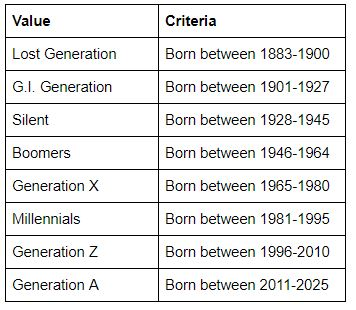

In order to make it easier we can create a __Criteria Year__ using a function which subtracts the lower bound of the age group from our year.   

In [605]:
def generate(val):
    if val == "5-14 years":
        return data4["Year"] - 5
    elif val == "15-24 years":
        return data4["Year"] - 15
    elif val == "25-34 years":
        return data4["Year"] -25
    elif val == "35-54 years":
        return data4["Year"] -35
    elif val == "55-74 years":
        return data4["Year"] -55
    elif val == "75+ years":
        return data4["Year"] -75
data['Criteria Year'] = ""
data['Criteria Year'] = data['Age'].apply(generate)

Now the __Generation__ column using the same principle.

In [606]:
def generation_value(val):
    if val>=1883 and val<=1900:
        return "Lost Generation"
    elif val>=1901 and val<=1927:
        return "G.I. Generation"
    elif val>=1928 and val<=1945:
        return "Silent"
    elif val>=1946 and val<=1964:
        return "Boomers"
    elif val>=1965 and val<=1980:
        return "Generation X"
    elif val>=1981 and val<=1995:
        return "Millennials"
    elif val>=1996 and val<=2010:
        return "Generation Z"
    elif val>=2011 and val<=2025:
        return "Generation A"
data["Generation"] = data["Criteria Year"].apply(generation_value)

In [607]:
data

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($),Suicides/100k,Criteria Year,Generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",6.711409,1972,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",5.194805,1952,Boomers
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",4.832585,1972,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",4.587156,1912,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",3.281079,1962,Boomers
...,...,...,...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,"86,142,018,069",5.383762,1962,Boomers
27835,Belgium,2011,female,25-34 years,6,707535,"527,008,453,887",0.848015,1962,Boomers
27836,Thailand,2016,male,75+ years,152,1124052,"411,755,164,833",13.522506,1912,G.I. Generation
27837,Netherlands,1998,female,15-24 years,21,934500,"432,476,116,419",2.247191,1972,Generation X


Good, now we can explore what we have as a result. We are interested in our __Year__, __Age__, and __Generation__ columns.

In [608]:
data["Year"].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2007, 2008, 2010, 1990, 2015, 1985,
       1986, 1991, 2005, 2006, 2009, 2011, 2012, 2013, 2014, 2016],
      dtype=int64)

In [609]:
data["Generation"].unique()

array(['Generation X', 'Boomers', 'G.I. Generation', 'Silent',
       'Millennials'], dtype=object)

In [610]:
data["Age"].value_counts()

35-54 years    4275
25-34 years    4194
15-24 years    4134
55-74 years    4084
75+ years      3724
5-14 years     3144
Name: Age, dtype: int64

In [611]:
data["Generation"].value_counts()

Boomers            8469
Generation X       4134
Silent             4084
G.I. Generation    3724
Millennials        3144
Name: Generation, dtype: int64

Noticeable, we have 6 age groups but 5 generations as both 25-34 years and 35-54 years fell into the __Booomers__ generation having different years in their rows.

In order to investigate the GDP values we need to get rid of the commas in this column and convert it to a numeric type.

In [612]:
data["GDP_for_year($)"]=data["GDP_for_year($)"].str.replace(",","")
data["GDP_for_year($)"].describe()

count           23555
unique           2256
top       39540080200
freq               13
Name: GDP_for_year($), dtype: object

In [613]:
data["GDP_for_year($)"]=pd.to_numeric(data["GDP_for_year($)"])

In [614]:
data["GDP_for_year($)"].describe()

count    2.355500e+04
mean     5.218537e+11
std      1.567357e+12
min      4.691962e+07
25%      1.596873e+10
50%      7.626128e+10
75%      3.233204e+11
max      1.812071e+13
Name: GDP_for_year($), dtype: float64

In [615]:
data

,Country,Year,Sex,Age,Suicides_no,Population,GDP_for_year($),Suicides/100k,Criteria Year,Generation
0,Albania,1987,male,15-24 years,21,312900,2156624900,6.711409,1972,Generation X
1,Albania,1987,male,35-54 years,16,308000,2156624900,5.194805,1952,Boomers
2,Albania,1987,female,15-24 years,14,289700,2156624900,4.832585,1972,Generation X
3,Albania,1987,male,75+ years,1,21800,2156624900,4.587156,1912,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,2156624900,3.281079,1962,Boomers
...,...,...,...,...,...,...,...,...,...,...
27834,Ukraine,2005,female,25-34 years,182,3380536,86142018069,5.383762,1962,Boomers
27835,Belgium,2011,female,25-34 years,6,707535,527008453887,0.848015,1962,Boomers
27836,Thailand,2016,male,75+ years,152,1124052,411755164833,13.522506,1912,G.I. Generation
27837,Netherlands,1998,female,15-24 years,21,934500,432476116419,2.247191,1972,Generation X


Looks fine, we can group the data with the __groupby()__ method by __country__, __year__ and __GDP__ with the population and suicides summed since each row in our dataset represents a different number of suicides for a different age group, sex, year and country. We use the aggregation sum for __Population__ and __Suicides_no__ and reset the index to start the count from 0.

In [616]:
data_gdp_capita=data.groupby(["Country","Year","GDP_for_year($)"]).agg({"Population":"sum","Suicides_no":"sum"}).reset_index()
data_gdp_capita.head(20)

,Country,Year,GDP_for_year($),Population,Suicides_no
0,Albania,1987,2156624900,1915800,73
1,Albania,1988,2126000000,2102100,63
2,Albania,1989,2335124988,2094500,68
3,Albania,1992,709452584,2060300,47
4,Albania,1993,1228071038,2768000,55
5,Albania,1994,1985673798,2504900,50
6,Albania,1995,2424499009,2903400,88
7,Albania,1996,3314898292,2940200,80
8,Albania,1997,2359903108,2790300,143
9,Albania,1998,2707123772,2970400,145


Now we have data with rows representing a specific year for every country. This makes it easier to find the __GDP per capita__.

In [617]:
data_gdp_capita["GDP_per_Capita"]=data_gdp_capita["GDP_for_year($)"]/data_gdp_capita["Population"]

In [618]:
data_gdp_capita.isnull().sum()

Country            0
Year               0
GDP_for_year($)    0
Population         0
Suicides_no        0
GDP_per_Capita     0
dtype: int64

We have no null values here which is definitely good.

In [619]:
data_gdp_capita

,Country,Year,GDP_for_year($),Population,Suicides_no,GDP_per_Capita
0,Albania,1987,2156624900,1915800,73,1125.704614
1,Albania,1988,2126000000,2102100,63,1011.369583
2,Albania,1989,2335124988,2094500,68,1114.884215
3,Albania,1992,709452584,2060300,47,344.344311
4,Albania,1993,1228071038,2768000,55,443.667283
...,...,...,...,...,...,...
2251,Uzbekistan,2010,39332770929,25651783,1077,1533.334776
2252,Uzbekistan,2011,45915191189,25978049,1631,1767.461105
2253,Uzbekistan,2012,51821573338,26381830,1214,1964.290322
2254,Uzbekistan,2013,57690453461,26838924,1662,2149.506942


If we want to rank the countries by total suicides we can group by the country and sum the suicides.

In [620]:
data_suicide = data.groupby(["Country"])["Suicides_no"].sum().reset_index(name ='Total Suicides')

Now we can sort our list of countries with __sort_values()__

In [621]:
data_suicide_country=data_suicide.sort_values(by="Total Suicides",ascending=False)
data_suicide_country=data_suicide_country.reset_index(drop=True)
data_suicide_country

,Country,Total Suicides
0,Russian Federation,815965
1,United States,759837
2,Japan,635785
3,France,240432
4,Ukraine,238061
...,...,...
94,Oman,33
95,Macau,27
96,Maldives,20
97,Antigua and Barbuda,11


In order to rank the continents by total suicides we need the continent mapping data file and merge our data with it.

In [622]:
continent_data=pd.read_csv("continent_mapping.csv")
continent_data

,country,continent
0,Albania,Europe
1,Antigua and Barbuda,North America
2,Argentina,South America
3,Armenia,Asia
4,Aruba,North America
...,...,...
96,United Arab Emirates,Asia
97,United Kingdom,Europe
98,United States,North America
99,Uruguay,South America


In [623]:
data_suicide_merged=data_suicide.merge(continent_data,left_index=True, right_index=True, how='left')
data_suicide_merged

,Country,Total Suicides,country,continent
0,Albania,1799,Albania,Europe
1,Antigua and Barbuda,11,Antigua and Barbuda,North America
2,Argentina,66678,Argentina,South America
3,Armenia,1752,Armenia,Asia
4,Aruba,101,Aruba,North America
...,...,...,...,...
94,United Arab Emirates,577,Turkmenistan,Asia
95,United Kingdom,116348,Ukraine,Europe
96,United States,759837,United Arab Emirates,Asia
97,Uruguay,11851,United Kingdom,Europe


A little bit of reshaping needed.

In [624]:
data_suicide_merged=data_suicide_merged.drop(["country"],axis=1)

In [625]:
data_suicide_merged

,Country,Total Suicides,continent
0,Albania,1799,Europe
1,Antigua and Barbuda,11,North America
2,Argentina,66678,South America
3,Armenia,1752,Asia
4,Aruba,101,North America
...,...,...,...
94,United Arab Emirates,577,Asia
95,United Kingdom,116348,Europe
96,United States,759837,Asia
97,Uruguay,11851,Europe


In [626]:
data_suicide_merged.columns = ["Country","Total Suicides","Continent",]
data_suicide_merged

,Country,Total Suicides,Continent
0,Albania,1799,Europe
1,Antigua and Barbuda,11,North America
2,Argentina,66678,South America
3,Armenia,1752,Asia
4,Aruba,101,North America
...,...,...,...
94,United Arab Emirates,577,Asia
95,United Kingdom,116348,Europe
96,United States,759837,Asia
97,Uruguay,11851,Europe


Good, now we can group it by continent and sort the same way as we did with the countries.

In [627]:
data_suicide_merged_gr=data_suicide_merged.groupby(["Continent"])["Total Suicides"].sum().reset_index(name ='Total Suicides')

In [628]:
data_suicide_merged_gr_s=data_suicide_merged_gr.sort_values(by="Total Suicides", ascending = False)
data_suicide_continent=data_suicide_merged_gr_s.reset_index(drop=True)
data_suicide_continent

,Continent,Total Suicides
0,Europe,1990440
1,Asia,1610009
2,North America,870384
3,South America,426552
4,Africa,141350
5,Oceania,91561


Let's look into the correlations between suicides, GDP per capita and population. We can build a scatter plot for this.

In [629]:
data_gdp_capita

,Country,Year,GDP_for_year($),Population,Suicides_no,GDP_per_Capita
0,Albania,1987,2156624900,1915800,73,1125.704614
1,Albania,1988,2126000000,2102100,63,1011.369583
2,Albania,1989,2335124988,2094500,68,1114.884215
3,Albania,1992,709452584,2060300,47,344.344311
4,Albania,1993,1228071038,2768000,55,443.667283
...,...,...,...,...,...,...
2251,Uzbekistan,2010,39332770929,25651783,1077,1533.334776
2252,Uzbekistan,2011,45915191189,25978049,1631,1767.461105
2253,Uzbekistan,2012,51821573338,26381830,1214,1964.290322
2254,Uzbekistan,2013,57690453461,26838924,1662,2149.506942


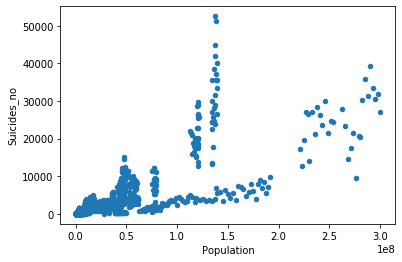

In [630]:
data_gdp_capita.plot.scatter("Population", "Suicides_no")

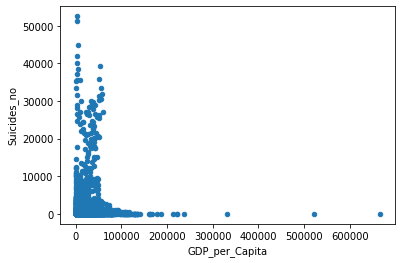

In [631]:
data_gdp_capita.plot.scatter("GDP_per_Capita", "Suicides_no")

Seems like we have outliers that don't let us see the details, let's cut them off.

In [632]:
data_gdp_capita2=data_gdp_capita[data_gdp_capita["GDP_per_Capita"]<=250000]

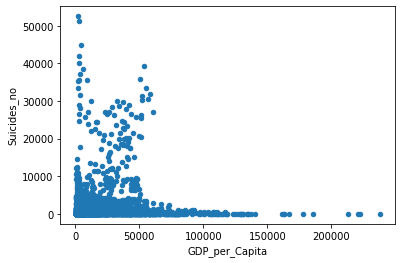

In [633]:
data_gdp_capita2.plot.scatter("GDP_per_Capita", "Suicides_no")

In case of the population we see that the suicide rate jumps when the population is between 100 and 150 millions, and the overall trend is the bigger the population - the higher the suicide rate.

In terms of the GDP per capita the majority of suicides happens where the GDP per capita is below 100000 and with most of the cases being in the below 50000 area.

Now we can visualize the total suicides over years.

In [634]:
data_tot_suic = data.groupby(["Year"])["Suicides_no"].sum().reset_index(name ='Total Suicides')
data_tot_suic_sorted=data_tot_suic.sort_values(by="Total Suicides", ascending=False)
data_tot_suic_sorted = data_tot_suic_sorted.reset_index(drop=True)
data_tot_suic_sorted

,Year,Total Suicides
0,2009,200785
1,1994,199798
2,2001,199235
3,2011,197844
4,2003,196967
5,2008,192607
6,2004,192027
7,1998,188808
8,2000,188305
9,1995,183723


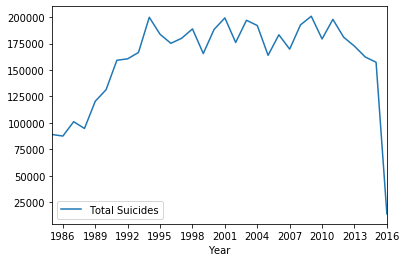

In [635]:
ax=data_tot_suic.plot.line(x="Year", y="Total Suicides")
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

Apparently we dont have enough data for 2016 but we notice the overall picture is that the number of suicides jumped in the mid 90s and keeps being high changing a bit every few years.

If we group our data by gender and year we can explore the number of suicides by gender over years.

In [636]:
data_suicide_gender = data.groupby(["Sex","Year"])["Suicides_no"].sum().reset_index(name ='Total Suicides')
data_suicide_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
Sex               64 non-null object
Year              64 non-null int64
Total Suicides    64 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 1.4+ KB


Let's separate them to make it easier.

In [637]:
male_suicide = data_suicide_gender[data_suicide_gender["Sex"]=="male"]
female_suicide = data_suicide_gender[data_suicide_gender["Sex"]=="female"]

In [638]:
male_suicide_sorted = male_suicide.sort_values(by="Total Suicides", ascending=False)
male_suicide_sorted = male_suicide_sorted.reset_index(drop=True)
male_suicide_sorted

,Sex,Year,Total Suicides
0,male,2009,160343
1,male,2001,158755
2,male,2003,155485
3,male,1994,155259
4,male,2011,152789
5,male,2004,151017
6,male,2008,149722
7,male,2010,146860
8,male,1998,145090
9,male,2000,144337


In [639]:
female_suicide_sorted = female_suicide.sort_values(by="Total Suicides", ascending=False)
female_suicide_sorted = female_suicide_sorted.reset_index(drop=True)
female_suicide_sorted

,Sex,Year,Total Suicides
0,female,2012,46918
1,female,1995,45279
2,female,2011,45055
3,female,1996,44764
4,female,1994,44539
5,female,2006,44426
6,female,1993,44239
7,female,2000,43968
8,female,1998,43718
9,female,2008,42885


Now we can plot them separately.

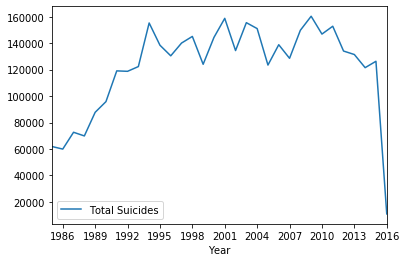

In [640]:
fig1=male_suicide.plot.line(x="Year", y="Total Suicides")
fig1.xaxis.set_major_locator(ticker.MultipleLocator(3))

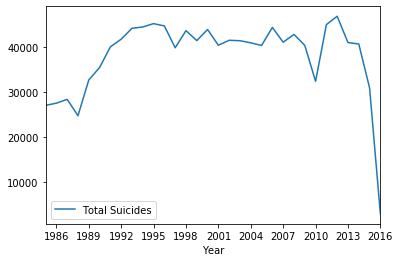

In [641]:
fig2=female_suicide.plot.line(x="Year", y="Total Suicides")
fig2.xaxis.set_major_locator(ticker.MultipleLocator(3))

The numbers for males is around 4 times higher than females on average as we can see.

We can do the same with the suicides by generation and age group, as was mentioned earlier we have 6 age groups and 5 generations since the __Boomers__ generation comnied two age groups in it.

In [642]:
data_suicide_generation = data.groupby(["Generation"])["Suicides_no"].sum().reset_index(name ='Total Suicides')
data_suicide_generation_sorted=data_suicide_generation.sort_values(by="Total Suicides",ascending=False)
data_suicide_generation_sorted=data_suicide_generation_sorted.reset_index(drop=True)
data_suicide_generation_sorted

,Generation,Total Suicides
0,Boomers,2659749
1,Silent,1245426
2,Generation X,642120
3,G.I. Generation,536894
4,Millennials,46107


[Text(0, 0, 'Boomers'),
 Text(0, 0, 'Silent'),
 Text(0, 0, 'Generation X'),
 Text(0, 0, 'G.I. Generation'),
 Text(0, 0, 'Millennials')]

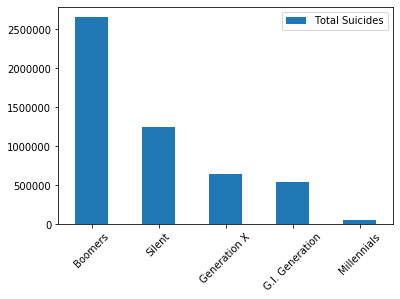

In [643]:
fig3 = data_suicide_generation_sorted.plot.bar()
fig3.set_xticklabels(data_suicide_generation_sorted["Generation"],rotation=45)

In [644]:
data_suicide_age_group = data.groupby(["Age"])["Suicides_no"].sum().reset_index(name ='Total Suicides')
data_suicide_age_group_sorted=data_suicide_age_group.sort_values(by="Total Suicides", ascending=False)
data_suicide_age_group_sorted=data_suicide_age_group_sorted.reset_index(drop=True)
data_suicide_age_group_sorted

,Age,Total Suicides
0,35-54 years,1780196
1,55-74 years,1245426
2,25-34 years,879553
3,15-24 years,642120
4,75+ years,536894
5,5-14 years,46107


[Text(0, 0, '35-54 years'),
 Text(0, 0, '55-74 years'),
 Text(0, 0, '25-34 years'),
 Text(0, 0, '15-24 years'),
 Text(0, 0, '75+ years'),
 Text(0, 0, '5-14 years')]

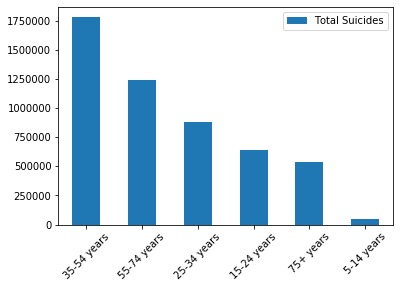

In [645]:
fig4 = data_suicide_age_group_sorted.plot.bar()
fig4.set_xticklabels(data_suicide_age_group_sorted["Age"],rotation=45)

The plot shows that people from 35-54 and 55-74 years age groups commit suicides the most. 